In [1]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np

In [2]:
from collections import Counter
import re
from nltk.corpus import stopwords
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from stop_words import get_stop_words
from collections import Counter
from collections import OrderedDict
import tensorflow as tf
from ordered_set import OrderedSet
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
#Initialize variable here
XRecordsNumber=[]
improvedTestAccuracy=[]
testAccuracy=[]
trainAccuracy=[]
trainAccuracyDefault=[]
testDefaultAccuracy=[]
trainPreAccuracy=[]
trainPreAccuracyDefault=[]
trainStartingIndex=0
trainEndingIndex=trainStartingIndex+100
testStartIndex=trainEndingIndex
testEndIndex=testStartIndex+100

In [4]:
#Function to remove stop words 
def removeStopWords(text):
    counts = Counter()
    words = re.compile(r'\w+')
    counts.update(words.findall(text.lower()))

    stop_words1 = list(get_stop_words('en'))         #About 900 stopwords
    nltk_words = list(stopwords.words('english')) #About 150 stopwords
    stop_words1.extend(nltk_words)
    sw_list = ['The',',','.']
    stop_words1.extend(sw_list)
    #text=' '.join(first100)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stop_words1]
    return " ".join(tokens_without_sw)
#print(removeStoeWords('hello of the sanja kanth'))

In [5]:
# function to calculate LCS 
def lcs(str_a, str_b):#, m, n):
    X=str_a.split(' ')
    Y=str_b.split(' ')
    m=len(str_a.split(' '))
    n=len(str_b.split(' '))
    L = [[0 for x in range(n+1)] for x in range(m+1)]
 
    # Following steps build L[m+1][n+1] in bottom up fashion. Note
    # that L[i][j] contains length of LCS of X[0..i-1] and Y[0..j-1]
    for i in range(m+1):
        for j in range(n+1):
            if i == 0 or j == 0:
                L[i][j] = 0
            elif X[i-1] == Y[j-1]:
                L[i][j] = L[i-1][j-1] + 1
            else:
                L[i][j] = max(L[i-1][j], L[i][j-1])
 
    # Following code is used to print LCS
    index = L[m][n]
 
    # Create a character array to store the lcs string
    lcs = [""] * (index+1)
    lcs[index] = ""
 
    # Start from the right-most-bottom-most corner and
    # one by one store characters in lcs[]
    i = m
    j = n
    while i > 0 and j > 0:
 
        # If current character in X[] and Y are same, then
        # current character is part of LCS
        if X[i-1] == Y[j-1]:
            lcs[index-1] = X[i-1]
            i-=1
            j-=1
            index-=1
 
        # If not same, then find the larger of two and
        # go in the direction of larger value
        elif L[i-1][j] > L[i][j-1]:
            i-=1
        else:
            j-=1
 
    #print (  " ".join(lcs))
    if lcs is None:
        return ""
    else:
        return " ".join(lcs).strip()
    #print ((lcs))
 
# Driver program
 

str_a ="The address mentioned is for vaiga and last name is sanjaikanth so"#"A B C B D A B"# "xBCDxFGxxxKLMx"
str_b ="my name  vaiga sanjaikanth and i am 8"#"B D C A B A"# "aBCDeFGhijKLMn"
m = len(str_a)
n = len(str_b)
#lcs(str_a.split(' '), str_b.split(' '))#, len(str_a.split(' ')), len(str_b.split(' ')))
lcs(str_a, str_b)#, len(str_a.split(' ')), len(str_b.split(' ')))

'name sanjaikanth'

In [6]:
#Function to populate new data frame based on newly created columns passed   
def populateDataFrame(dfCheck,column_names_In):
    dfReturn = pd.DataFrame(columns = column_names_In)
    dfReturn
    for row in dfCheck.itertuples(index=True, name='Pandas'):
        Value1=0
        Value2=0
        Value3=0
        Value4=0
        Value5=0
        Value6=0
        Value7=0
        Value8=0
        Value9=0
        Value10=0
        if column_names_In[0] in row.tweet :
            Value1 =1
        if column_names_In[1] in row.tweet :
            Value2 =1
        if column_names_In[2] in row.tweet :
            Value3 =1
        if column_names_In[3] in row.tweet :
            Value4 =1
        if column_names_In[4] in row.tweet :
            Value5 =1
        if column_names_In[5] in row.tweet :
            Value6 =1
        if column_names_In[6] in row.tweet :
            Value7 =1
        if column_names_In[7] in row.tweet :
            Value8 =1
        if column_names_In[8] in row.tweet :
            Value9 =1
        if column_names_In[9] in row.tweet :
            Value10 =1

        #if Value1==1 or Value2==1 or Value3==1 or Value4==1 or Value5==1 or Value6==1 or Value7==1 or Value8==1 or Value9==1 or Value10==1:
        dr = {column_names_In[0]:Value1, column_names_In[1]:Value2, column_names_In[2]:Value3, column_names_In[3]:Value4
                  , column_names_In[4]:Value5, column_names_In[5]:Value6, column_names_In[6]:Value7, column_names_In[7]:Value8
                  , column_names_In[8]:Value9, column_names_In[9]:Value10
                  ,'XDisinformativeX':row.Disinformative,'XFakeX':row.Fake,
                  'XMisInformativeX':row.MisInformative,'XRealX':row.Real,'XUnverifiedX':row.Unverified}
        dfReturn = dfReturn.append(dr, ignore_index = True)
    
    dfReturn = dfReturn.astype(int)
    dfReturn
    return dfReturn
    #del dfInherited["ID"]

In [7]:
#function to find LCS in a dataframe
def findLCS(dfIn):
    lstIn=dfIn["tweet"].tolist()
    resultLCS=set()
    for i in  lstIn:
        for j in  lstIn:
            if i != j:
                resultLCS.add(lcs(i, j))
    return list(resultLCS)

In [8]:
#function to find longest LCS in a dataframe
def findLongestLCS(dfIn):
    lstLCS=findLCS(dfIn)
    #print(lstLCS)
    if len(lstLCS)==0:
        return ""
    else:
        return  max(lstLCS, key=len)

In [9]:
#Function to find max occuring words
def getMaxOccuringWords(dfIn):
    text=' '.join(dfIn["tweet"].to_numpy())
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stop_words1]
    #print(tokens_without_sw)
    counts = Counter(tokens_without_sw)
    FirstCols=counts.most_common(10)
    #print(FirstCols)
    CommonMax10tokens= [word for word, word_count in FirstCols]
    return CommonMax10tokens
    

In [10]:
#Function to get column name from each of the 5 classifiers
def GetMaxWordsFromClassifier(dfFake,dfDisinformative ,dfMisInformative,dfReal ,dfUnverified):
    lstFake=getMaxOccuringWords(dfFake)
    print(lstFake)
    lstDisinformative = getMaxOccuringWords(dfDisinformative)
    print(lstDisinformative)
    lstMisInformative = getMaxOccuringWords(dfMisInformative)
    print(lstMisInformative)
    lstReal = getMaxOccuringWords(dfReal)
    print(lstReal)
    lstUnverified=getMaxOccuringWords(dfUnverified)
    print(lstUnverified)
    lstResultCommon=OrderedSet()
    isExit=False
    while isExit!=True and len(lstResultCommon)<10  and (len(lstFake)!=0 or len(lstDisinformative)!=0 or len(lstMisInformative)!=0 or 
    len(lstReal)!=0 or len(lstUnverified)!=0 ):
        isExit=True
        if len(lstFake)>0 and len(lstResultCommon)<10:
            lstResultCommon.add(lstFake.pop(0))
            isExit=False
        if len(lstDisinformative)>0 and len(lstResultCommon)<10:
            lstResultCommon.add(lstDisinformative.pop(0))
            isExit=False
        if len(lstMisInformative)>0 and len(lstResultCommon)<10:
            lstResultCommon.add(lstMisInformative.pop(0))
            isExit=False
        if len(lstReal)>0 and len(lstResultCommon)<10:
            lstResultCommon.add(lstReal.pop(0))
            isExit=False
        if len(lstUnverified)>0 and len(lstResultCommon)<10:
            lstResultCommon.add(lstUnverified.pop(0))
            isExit=False
    print(list(lstResultCommon))
    return list(lstResultCommon)

In [11]:
#Loading Data
df = pd.read_excel('SourceData2022.xlsx')
df

,ID,tweet,label
0,969,U.S. Army Corps of Engineers mobilizing to con...,Real
1,976,"The EU’s chief Brexit negotiator, Michel Barni...",Real
2,985,Work to convert the Day Patient Unit at Guerns...,Real
3,1007,US could be worse than Italy if 15-day guideli...,Unverified
4,1011,Viral message claiming that disinfection will ...,Fake
...,...,...,...
4150,2751,Gargling salt with water “eliminates” the 2019...,Fake
4151,2752,Former senator Antonio Trillanes IV allegedly ...,Fake
4152,2754,MOSTLY “Italy has decided not to treat their e...,Fake
4153,2762,it is only a matter of time until there is a c...,Real


In [12]:
#Removing stopwords from news aka tweets
for index, row in df.iterrows():
    df.at[index, "tweet"]=removeStopWords(df.at[index, "tweet"])

In [13]:
colTarget=['XDisinformativeX' ,'XFakeX','XMisInformativeX','XRealX','XUnverifiedX']

In [14]:
#Onehot encoding of labels
one_hot = pd.get_dummies(df['label'])
df = df.join(one_hot)

In [15]:
#Initial find most frequent words
from collections import Counter
import re
from nltk.corpus import stopwords
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from stop_words import get_stop_words
from collections import Counter

counts = Counter()
words = re.compile(r'\w+')


stop_words1 = list(get_stop_words('en'))         #About 900 stopwords
nltk_words = list(stopwords.words('english')) #About 150 stopwords
stop_words1.extend(nltk_words)
sw_list = ['The',',','.']
stop_words1.extend(sw_list)
text=' '.join(df[0:10]["tweet"].to_numpy())
text = re.sub(r'[^\w\s]', '', text)
text_tokens = word_tokenize(text)




tokens_without_sw = [word for word in text_tokens if not word in stop_words1]
counts = Counter(tokens_without_sw)
FirstCols=counts.most_common(10)
most_common_words= [word for word, word_count in FirstCols]
most_common_words

['Hospital',
 'US',
 'convert',
 'old',
 'Unit',
 'hospitalized',
 'risk',
 'Army',
 'Corps',
 'Engineers']

In [16]:
#Creating empty Dataframe
column_names =most_common_words# ["ID","COVID-19", "CDC", "center disease control","vaccine","payment"]

In [17]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))
# compile the keras model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# define the keras model
modelDefault = Sequential()
modelDefault.add(Dense(12, input_dim=10, activation='relu'))
modelDefault.add(Dense(8, activation='relu'))
modelDefault.add(Dense(5, activation='softmax'))
# compile the keras model
optDefault = SGD(learning_rate=0.01, momentum=0.9)
modelDefault.compile(loss='categorical_crossentropy', optimizer=optDefault, metrics=['accuracy'])

In [18]:
##Starting loop

In [19]:
import warnings
with warnings.catch_warnings(record=True):
    while trainEndingIndex<df.shape[0] :#testStartIndex :
        print("trainStartingIndex"+str(trainStartingIndex))
        print("trainEndingIndex"+str(trainEndingIndex))
        print("testStartIndex"+str(testStartIndex))
        print("testEndIndex"+str(testEndIndex))
        print("most_common_words:"+str(most_common_words))
        print("column_names:"+str(column_names))
        ##Training 
        dfTrain= df[trainStartingIndex:trainEndingIndex] 
        dfInheritedDefault = pd.DataFrame(columns = most_common_words)# Dataset without self configure column
        dfInheritedDefault=populateDataFrame(dfTrain,most_common_words)    
        dfInherited = pd.DataFrame(columns = column_names) #Dataset with self configure column
        dfInherited=populateDataFrame(dfTrain,column_names)
        #Converting to array
         
        datasetDefault=dfInheritedDefault.to_numpy()
        dataset=dfInherited.to_numpy()
        # split into input (X) and output (y) variables
        XTrainDefault = datasetDefault[:,0:10]
        yTrainDefault = datasetDefault[:,10:]
        XTrain = dataset[:,0:10]
        yTrain = dataset[:,10:]
        print(df.iloc[0]["tweet"])
        print(XTrain[0])
        print(yTrain[0])
        # fit the keras model on the dataset
        _, accuracyPreDefault = modelDefault.evaluate(XTrainDefault, yTrainDefault, verbose=0)
        trainPreAccuracyDefault.append((trainEndingIndex,accuracyPreDefault*100))
        
        modelDefault.fit(XTrainDefault, yTrainDefault, epochs=150, batch_size=10, verbose=0)
        _, accuracyDefault = modelDefault.evaluate(XTrainDefault, yTrainDefault, verbose=0)
        trainAccuracyDefault.append((trainEndingIndex,accuracyDefault*100))
        
        _, accuracy = model.evaluate(XTrain, yTrain, verbose=0)
        trainPreAccuracy.append((trainEndingIndex,accuracy*100))
        model.fit(XTrain, yTrain, epochs=150, batch_size=10, verbose=0)
        # evaluate the keras model
        print('Default Train Accuracy: %.2f' % (accuracyDefault*100))
        _, accuracy = model.evaluate(XTrain, yTrain, verbose=0)
        print('Train Accuracy: %.2f' % (accuracy*100))
        XRecordsNumber.append(testEndIndex)
        trainAccuracy.append((trainEndingIndex,accuracy*100))
        ##End Training 


        ##Testing
        most_commonLCS_words=column_names
        XTesttweet=df[testStartIndex:testEndIndex]
        XTestDefault=populateDataFrame (XTesttweet,most_common_words)
        XTest=populateDataFrame (XTesttweet,column_names)
        #Converting to array
        datasetDefault=XTestDefault.to_numpy()
        dataset=XTest.to_numpy()
        dataset[:,0:10][0]
        XTestDefault = datasetDefault[:,0:10]
        XTest = dataset[:,0:10]
        predict_x = model.predict(XTest)
        # split into input (X) and output (y) variables
        testXActualDefault = datasetDefault[:,0:10]
        testXActual = dataset[:,0:10]
        testyActualDefault = datasetDefault[:,10:]
        testyActual = dataset[:,10:]
        # evaluate the keras model
        _, accuracyDefault = modelDefault.evaluate(testXActualDefault, testyActualDefault, verbose=0)
        _, accuracy = model.evaluate(testXActual, testyActual, verbose=0)
        testDefaultAccuracy.append((testEndIndex,accuracyDefault*100))
        testAccuracy.append((testEndIndex,accuracy*100))
        ##End Testing

        ##Updating Predicted Y Value
        XTesttweet["YXDisinformativeX"]=0
        XTesttweet["YXFakeX"]=0
        XTesttweet["YXFakeX"]=0
        XTesttweet["YXMisInformativeX"]=0
        XTesttweet["YXRealX"]=0
        XTesttweet["YXUnverifiedX"]=0
        for index, row in XTesttweet.iterrows():
            XTesttweet.at[index, "Y"+colTarget[ np.argmax(predict_x[index-testStartIndex], axis=0)]]=1
        testyPredicted=XTesttweet.iloc[:,8:].values
        ##End Updating Predicted Y Value

        ##LCS Calculations
        dfYFake = XTesttweet[XTesttweet['YXFakeX'] ==1]
        dfYDisinformative = XTesttweet[XTesttweet['YXDisinformativeX'] ==1]
        dfYMisInformative = XTesttweet[XTesttweet['YXMisInformativeX'] ==1]
        dfYReal = XTesttweet[XTesttweet['YXRealX'] ==1]
        dfYUnverified = XTesttweet[XTesttweet['YXUnverifiedX'] ==1]
        most_commonLCS_words=GetMaxWordsFromClassifier(dfYFake,dfYDisinformative,dfYMisInformative,dfYReal,dfYUnverified)
        #most_commonLCS_words
        #appending with intial most common and take first 10
        most_commonLCS_words.extend(most_common_words)
        most_commonLCS_words=list(OrderedDict.fromkeys(most_commonLCS_words))
        most_commonLCS_words=most_commonLCS_words[0:10]
        print("New Columns:"+str(most_commonLCS_words))
        ##End LCS Calculations

        XTesttweet=df[testStartIndex:testEndIndex]
        column_names=most_commonLCS_words
        #print(column_names)
        XTest=populateDataFrame (XTesttweet,column_names)
        #Converting to array
        dataset=XTest.to_numpy()
        # split into input (X) and output (y) variables
        testXActual = dataset[:,0:10]
        testyActual = dataset[:,10:]
        # evaluate the keras model
        _, accuracy = model.evaluate(testXActual, testyActual, verbose=0)
        print('Improved Accuracy: %.2f' % (accuracy*100))
        improvedTestAccuracy.append((testEndIndex,accuracy*100))
        trainStartingIndex=trainStartingIndex+100
        trainEndingIndex=trainStartingIndex+100
        testStartIndex=testStartIndex+100
        testEndIndex=testStartIndex+100

trainStartingIndex0
trainEndingIndex100
testStartIndex100
testEndIndex200
most_common_words:['Hospital', 'US', 'convert', 'old', 'Unit', 'hospitalized', 'risk', 'Army', 'Corps', 'Engineers']
column_names:['Hospital', 'US', 'convert', 'old', 'Unit', 'hospitalized', 'risk', 'Army', 'Corps', 'Engineers']
US Army Corps Engineers mobilizing convert hotels dorms hospitals
[0 1 1 0 0 0 0 1 1 1]
[0 0 0 1 0]
Default Train Accuracy: 72.00
Train Accuracy: 72.00
['coronavirus', 'COVID19', 'Video', 'shows', 'people', 'China', 'Coronavirus', 'This', 'spread', 'government']
[]
[]
[]
['US', 'Trump', 'President', 'Donald', 'coronavirus', 'Coronavirus', 'cases', 'reported', 'announced', 'Swiss']
['coronavirus', 'US', 'COVID19', 'Trump', 'Video', 'President', 'shows', 'Donald', 'people', 'China']
New Columns:['coronavirus', 'US', 'COVID19', 'Trump', 'Video', 'President', 'shows', 'Donald', 'people', 'China']
Improved Accuracy: 60.00
trainStartingIndex100
trainEndingIndex200
testStartIndex200
testEndIndex

Improved Accuracy: 26.00
trainStartingIndex900
trainEndingIndex1000
testStartIndex1000
testEndIndex1100
most_common_words:['Hospital', 'US', 'convert', 'old', 'Unit', 'hospitalized', 'risk', 'Army', 'Corps', 'Engineers']
column_names:['COVID19', 'coronavirus', 'money', 'outbreak', 'March', 'pandemic', 'US', 'amid', 'Image', 'New']
US Army Corps Engineers mobilizing convert hotels dorms hospitals
[0 1 0 0 0 0 0 1 0 0]
[0 0 0 1 0]
Default Train Accuracy: 79.00
Train Accuracy: 84.00
['money', 'streets', 'People', 'Italy', 'throwing', 'felt', 'couldnt', 'save', 'COVID19', 'Images']
[]
[]
['coronavirus', 'COVID19', 'quarantine', 'Hong', 'Kong', 'China', 'positive', 'people', 'due', 'US']
[]
['money', 'coronavirus', 'streets', 'COVID19', 'People', 'quarantine', 'Italy', 'Hong', 'throwing', 'Kong']
New Columns:['money', 'coronavirus', 'streets', 'COVID19', 'People', 'quarantine', 'Italy', 'Hong', 'throwing', 'Kong']
Improved Accuracy: 17.00
trainStartingIndex1000
trainEndingIndex1100
testStar

['coronavirus', 'COVID19', 'China', 'people', 'outbreak', 'In', 'infected', 'cases', 'says', 'Wuhan']
[]
[]
[]
[]
['coronavirus', 'COVID19', 'China', 'people', 'outbreak', 'In', 'infected', 'cases', 'says', 'Wuhan']
New Columns:['coronavirus', 'COVID19', 'China', 'people', 'outbreak', 'In', 'infected', 'cases', 'says', 'Wuhan']
Improved Accuracy: 98.00
trainStartingIndex1900
trainEndingIndex2000
testStartIndex2000
testEndIndex2100
most_common_words:['Hospital', 'US', 'convert', 'old', 'Unit', 'hospitalized', 'risk', 'Army', 'Corps', 'Engineers']
column_names:['coronavirus', 'COVID19', 'China', 'people', 'outbreak', 'In', 'infected', 'cases', 'says', 'Wuhan']
US Army Corps Engineers mobilizing convert hotels dorms hospitals
[0 1 0 0 0 0 0 0 0 0]
[0 1 0 0 0]
Default Train Accuracy: 99.00
Train Accuracy: 99.00
['coronavirus', 'China', 'people', 'Wuhan', 'Chinese', 'In', 'new', 'People', 'Partially', 'infected']
[]
[]
[]
[]
['coronavirus', 'China', 'people', 'Wuhan', 'Chinese', 'In', 'new'

US Army Corps Engineers mobilizing convert hotels dorms hospitals
[0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0]
Default Train Accuracy: 100.00
Train Accuracy: 100.00
['coronavirus', 'A', 'Coronavirus', 'COVID19', 'video', 'China', 'claim', 'patients', 'people', 'lockdown']
[]
[]
[]
[]
['coronavirus', 'A', 'Coronavirus', 'COVID19', 'video', 'China', 'claim', 'patients', 'people', 'lockdown']
New Columns:['coronavirus', 'A', 'Coronavirus', 'COVID19', 'video', 'China', 'claim', 'patients', 'people', 'lockdown']
Improved Accuracy: 76.00
trainStartingIndex2900
trainEndingIndex3000
testStartIndex3000
testEndIndex3100
most_common_words:['Hospital', 'US', 'convert', 'old', 'Unit', 'hospitalized', 'risk', 'Army', 'Corps', 'Engineers']
column_names:['coronavirus', 'A', 'Coronavirus', 'COVID19', 'video', 'China', 'claim', 'patients', 'people', 'lockdown']
US Army Corps Engineers mobilizing convert hotels dorms hospitals
[0 1 0 0 1 0 1 0 1 1]
[0 1 0 0 0]
Default Train Accuracy: 80.00
Train Accuracy: 76.00
['A

Default Train Accuracy: 95.00
Train Accuracy: 95.00
['coronavirus', 'COVID19', 'new', 'US', 'people', 'Covid19', 'virus', 'vaccine', 'hours', 'two']
[]
[]
[]
[]
['coronavirus', 'COVID19', 'new', 'US', 'people', 'Covid19', 'virus', 'vaccine', 'hours', 'two']
New Columns:['coronavirus', 'COVID19', 'new', 'US', 'people', 'Covid19', 'virus', 'vaccine', 'hours', 'two']
Improved Accuracy: 67.00
trainStartingIndex3900
trainEndingIndex4000
testStartIndex4000
testEndIndex4100
most_common_words:['Hospital', 'US', 'convert', 'old', 'Unit', 'hospitalized', 'risk', 'Army', 'Corps', 'Engineers']
column_names:['coronavirus', 'COVID19', 'new', 'US', 'people', 'Covid19', 'virus', 'vaccine', 'hours', 'two']
US Army Corps Engineers mobilizing convert hotels dorms hospitals
[0 1 0 0 0 0 0 0 0 0]
[0 1 0 0 0]
Default Train Accuracy: 67.00
Train Accuracy: 67.00
['coronavirus', 'COVID19', 'pandemic', 'outbreak', 'first', 'US', 'amid', 'Thursday', 'due', 'tested']
[]
[]
[]
[]
['coronavirus', 'COVID19', 'pandem

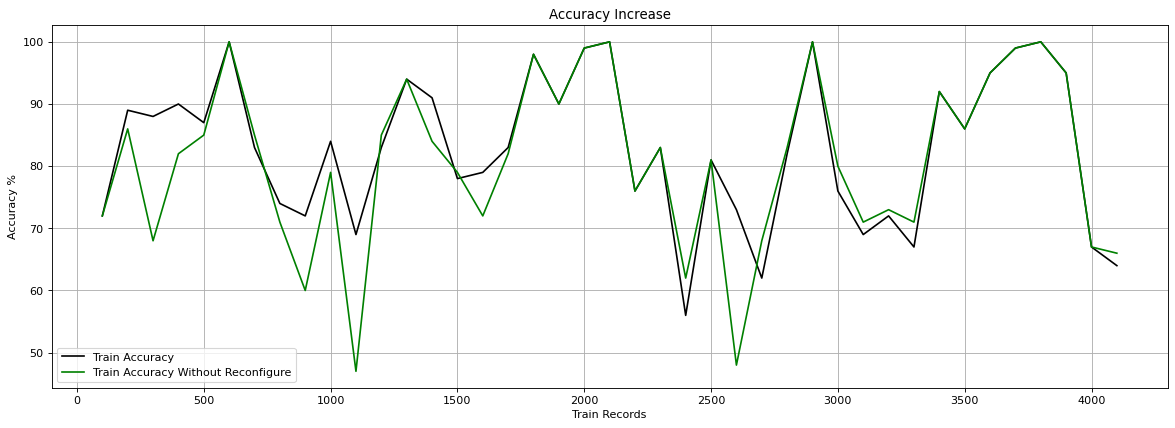

In [20]:
#Creating the plot


figure(figsize=(18, 6), dpi=80)
plt.title("Accuracy Increase")
#plt.plot(*zip(* improvedTestAccuracy[:100]), color='darkblue',  label="Updated Test Accuracy")
#plt.plot( *zip(* testAccuracy[:100]), color='red',  label="Test Accuracy")
#plt.plot( *zip(*  trainPreAccuracy[:100]), color='yellow',  label="Train Pre Accuracy")
plt.plot( *zip(*  trainAccuracy[:100]), color='black',  label="Train Accuracy")
plt.plot( *zip(*  trainAccuracyDefault[:100]), color='green',  label="Train Accuracy Without Reconfigure")
#plt.plot( *zip(*  trainPreAccuracyDefault[:100]), color='orange',  label="Train Pre Accuracy Without Reconfigure")

#plt.plot( *zip(*  testDefaultAccuracy[:100]), color='purple',  label="Test Accuracy Without Reconfigure")

plt.xlabel("Train Records")
plt.ylabel("Accuracy %")

plt.grid(True)
plt.legend()

plt.show()